In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [16]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df=df.drop(["sepal length (cm)","sepal width (cm)"],axis="columns")
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


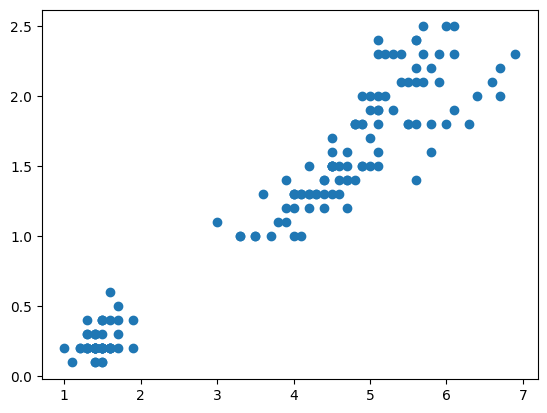

In [18]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])


In [19]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.477123363965468,
 13.91690875790876,
 11.128566855172117,
 9.209557208237987,
 7.828809523809525,
 6.456494541406307]

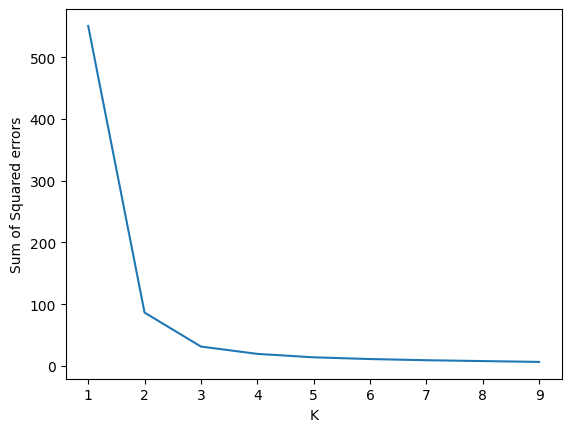

In [20]:
plt.xlabel("K")
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

From elbow method we foundout we need 3 clusters

In [21]:
scaler=MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df[["petal length (cm)"]]=scaler.transform(df[["petal length (cm)"]])

scaler.fit(df[["petal width (cm)"]])
df[["petal width (cm)"]]=scaler.transform(df[["petal width (cm)"]])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [22]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
df["cluster_no"]=y_pred
df

,petal length (cm),petal width (cm),cluster_no
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


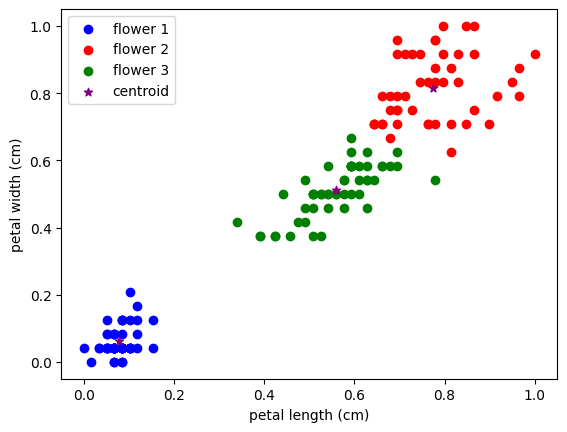

In [25]:
df0=df[df.cluster_no==0]
df1=df[df.cluster_no==1]
df2=df[df.cluster_no==2]

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="blue",label="flower 1")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red",label="flower 2")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green",label="flower 3")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()